<a href="https://colab.research.google.com/github/jeswitha2003/Monthly_solar_data/blob/main/monthly_solar_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

System configuration

The solar EV charging simulation is based on a real world setup in Berlin, Germany (Lat: 52.53, Lng: 13.38), using PVWatts website these information collected below:

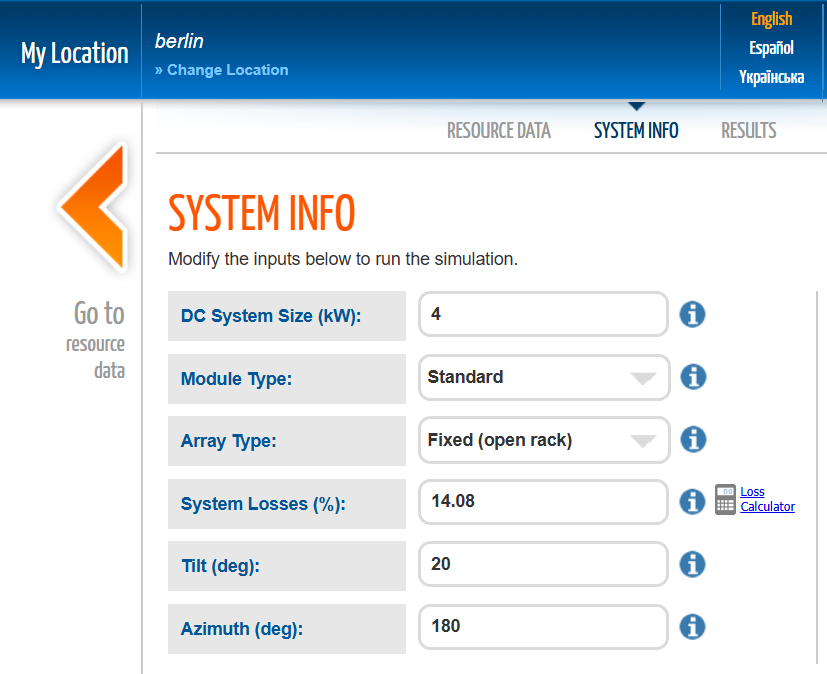


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_data = {
    'Month' : ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Solar_Radiation_kWh_m2_day' : [0.65, 1.33, 2.81, 5.24, 5.17, 5.89, 5.84, 5.06, 3.54, 2.50, 0.71, 0.45],
    'AC_Energy_Kwh' : [66, 125, 284, 504, 501, 544, 551, 481, 333, 252, 68, 43]
}

monthly_solar_df = pd.DataFrame(monthly_data)

#Lets assume EV battery capacity and charging efficiency
ev_battery_kWh = 40
charging_efficiency = 0.9

#calculate number of EVs charged per month
monthly_solar_df['EVs_Charged'] = (monthly_solar_df['AC_Energy_Kwh'] * charging_efficiency) / ev_battery_kWh

monthly_solar_df

,Month,Solar_Radiation_kWh_m2_day,AC_Energy_Kwh,EVs_Charged
0,January,0.65,66,1.4850
1,February,1.33,125,2.8125
2,March,2.81,284,6.3900
3,April,5.24,504,11.3400
4,May,5.17,501,11.2725
5,June,5.89,544,12.2400
6,July,5.84,551,12.3975
7,August,5.06,481,10.8225
8,September,3.54,333,7.4925
9,October,2.50,252,5.6700


In [16]:
monthly_solar_df = pd.read_csv('/content/drive/MyDrive/projects/monthly_solar_data.csv')
monthly_solar_df

,Month,Solar_Radiation_kWh_m2_day,AC_Engergy_kWh,Evs_Charged
0,January,0.65,66,1.4850
1,February,1.33,125,2.8125
2,March,2.81,284,6.3900
3,April,5.24,504,11.3400
4,May,5.17,501,11.2725
5,June,5.89,544,12.2400
6,July,5.84,551,12.3975
7,August,5.06,481,10.8225
8,September,3.54,333,7.4925
9,October,2.50,252,5.6700


/tmp/ipython-input-2-2103115116.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_solar_df, x='Month', y='EVs_Charged', palette='viridis')


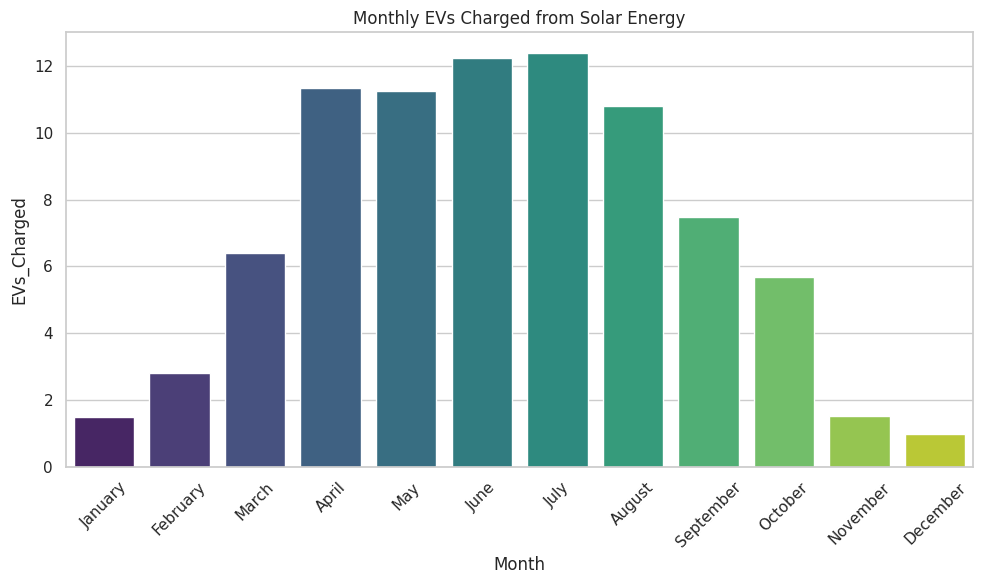

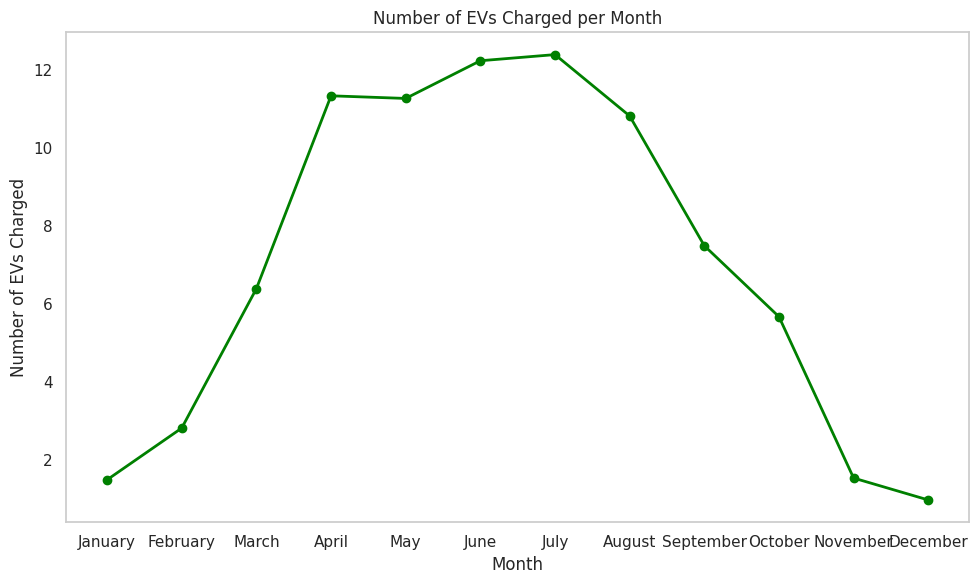

/tmp/ipython-input-2-2103115116.py:59: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


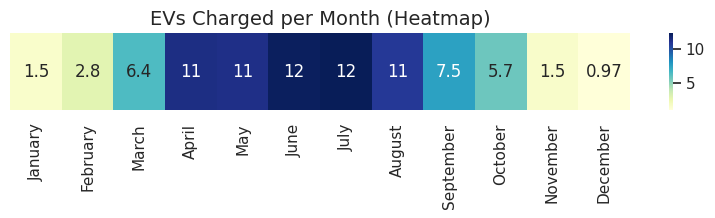

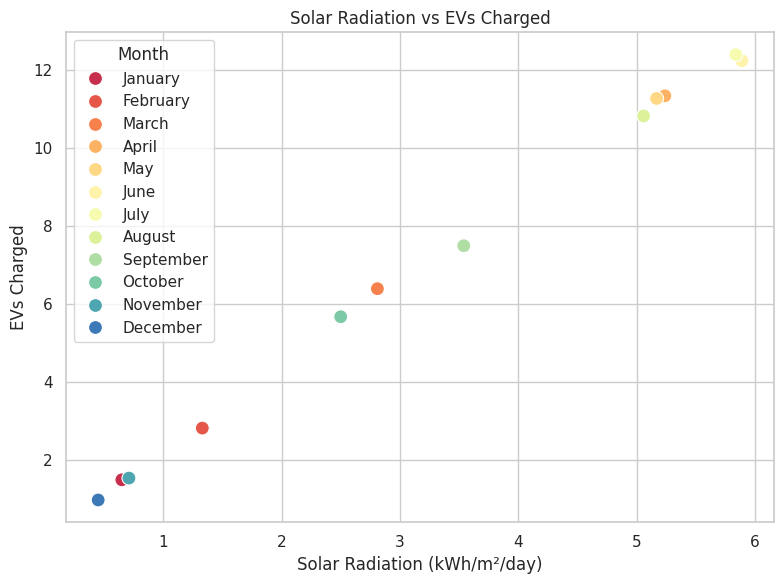

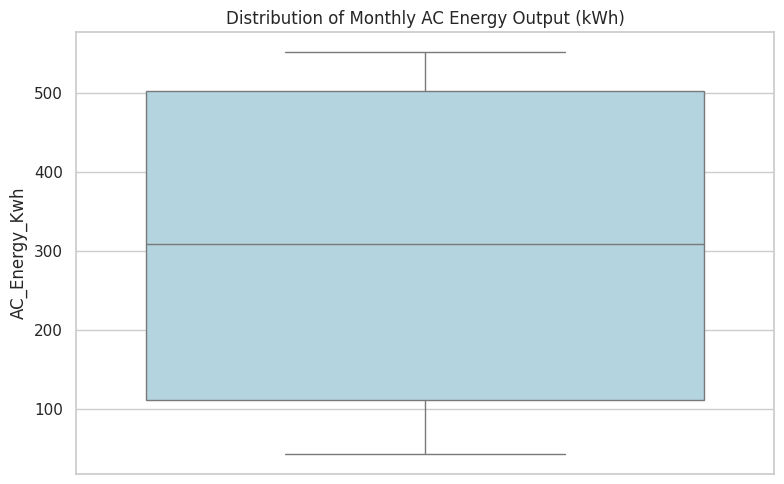

,Month,EVs_Charged
0,July,12.3975
1,June,12.2400
2,April,11.3400
3,May,11.2725
4,August,10.8225


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

monthly_data = {
    'Month' : ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Solar_Radiation_kWh_m2_day' : [0.65, 1.33, 2.81, 5.24, 5.17, 5.89, 5.84, 5.06, 3.54, 2.50, 0.71, 0.45],
    'AC_Energy_Kwh' : [66, 125, 284, 504, 501, 544, 551, 481, 333, 252, 68, 43]
}

monthly_solar_df = pd.DataFrame(monthly_data)

#Lets assume EV battery capacity and charging efficiency
ev_battery_kWh = 40
charging_efficiency = 0.9

#calculate number of EVs charged per month
monthly_solar_df['EVs_Charged'] = (monthly_solar_df['AC_Energy_Kwh'] * charging_efficiency) / ev_battery_kWh

#SQLite database in memory
conn = sqlite3.connect(":memory:")
monthly_solar_df.to_sql("solar_data", conn, index=False, if_exists="replace")

#where morethan 10 EVs were charged
query_result = pd.read_sql_query("""
SELECT Month, EVs_Charged
FROM solar_data
WHERE EVs_Charged > 10
ORDER BY EVs_Charged DESC
""", conn)

sns.set(style = 'whitegrid')

#barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_solar_df, x='Month', y='EVs_Charged', palette='viridis')
plt.title('Monthly EVs Charged from Solar Energy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#lineplot
plt.figure(figsize=(10, 6))
plt.plot(monthly_solar_df['Month'], monthly_solar_df['EVs_Charged'], marker='o', color='green', linewidth=2)
plt.title('Number of EVs Charged per Month')
plt.xlabel('Month')
plt.ylabel('Number of EVs Charged')
plt.grid()
plt.tight_layout()
plt.show()

#Heatmap
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10, 1))
sns.heatmap([monthly_solar_df['EVs_Charged']], cmap='YlGnBu', annot=True, cbar=True, xticklabels=month_order)
plt.title("EVs Charged per Month (Heatmap)", fontsize=14)
plt.yticks([])
plt.tight_layout()
plt.show()

#Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=monthly_solar_df, x='Solar_Radiation_kWh_m2_day', y='EVs_Charged', hue='Month', palette='Spectral', s=100)
plt.title('Solar Radiation vs EVs Charged')
plt.xlabel('Solar Radiation (kWh/m²/day)')
plt.ylabel('EVs Charged')
plt.grid(True)
plt.tight_layout()
plt.show()

#Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=monthly_solar_df['AC_Energy_Kwh'], color='lightblue')
plt.title('Distribution of Monthly AC Energy Output (kWh)')
plt.tight_layout()
plt.show()

query_result

/tmp/ipython-input-3-326596840.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_solar_df, x='Month', y='EVs_Charged', palette='viridis', ax=axs[0, 0])


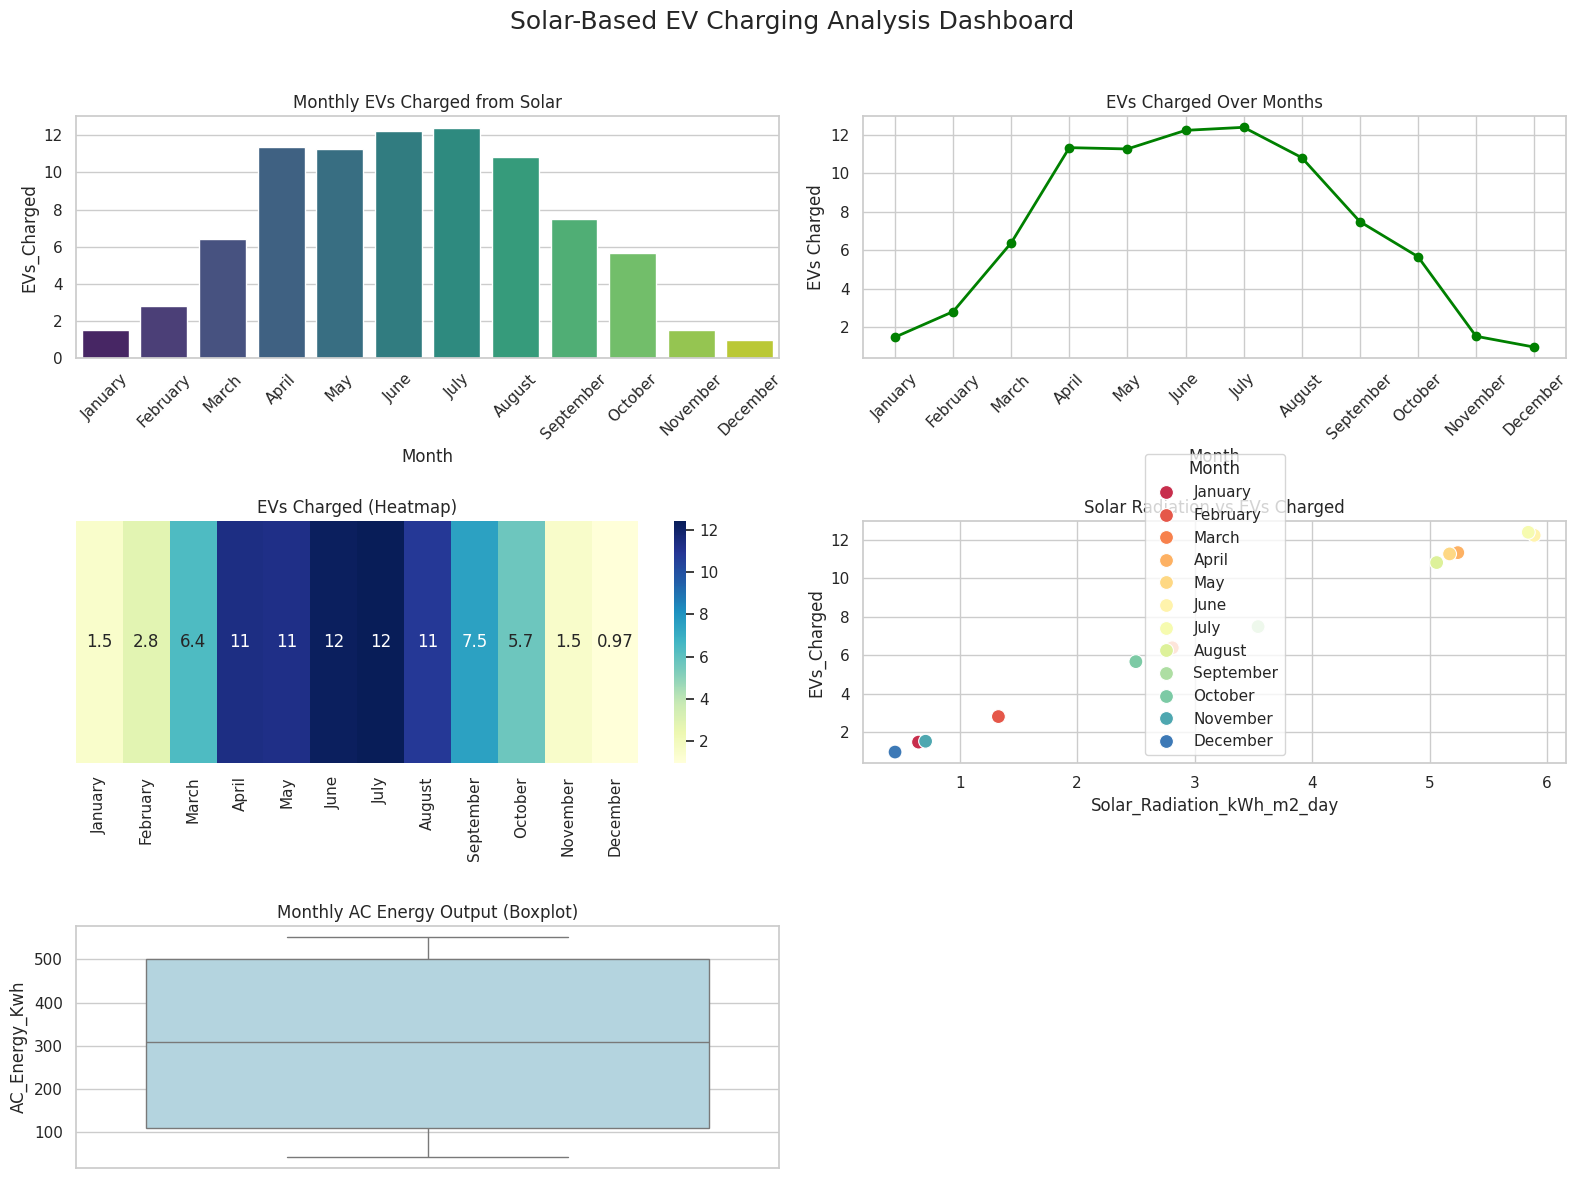

,Month,EVs_Charged
0,July,12.3975
1,June,12.2400
2,April,11.3400
3,May,11.2725
4,August,10.8225


In [3]:
# Re-import and re-run everything after reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# Recreate data
monthly_data = {
    'Month' : ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December'],
    'Solar_Radiation_kWh_m2_day' : [0.65, 1.33, 2.81, 5.24, 5.17, 5.89,
                                    5.84, 5.06, 3.54, 2.50, 0.71, 0.45],
    'AC_Energy_Kwh' : [66, 125, 284, 504, 501, 544, 551, 481, 333, 252, 68, 43]
}

monthly_solar_df = pd.DataFrame(monthly_data)
ev_battery_kWh = 40
charging_efficiency = 0.9
monthly_solar_df['EVs_Charged'] = (monthly_solar_df['AC_Energy_Kwh'] * charging_efficiency) / ev_battery_kWh

# SQL setup
conn = sqlite3.connect(":memory:")
monthly_solar_df.to_sql("solar_data", conn, index=False, if_exists="replace")
query_result = pd.read_sql_query("""
SELECT Month, EVs_Charged
FROM solar_data
WHERE EVs_Charged > 10
ORDER BY EVs_Charged DESC
""", conn)

# Visualization layout: 3 rows, 2 columns
fig, axs = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Solar-Based EV Charging Analysis Dashboard', fontsize=18)

# Barplot
sns.barplot(data=monthly_solar_df, x='Month', y='EVs_Charged', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Monthly EVs Charged from Solar')
axs[0, 0].tick_params(axis='x', rotation=45)

# Lineplot
axs[0, 1].plot(monthly_solar_df['Month'], monthly_solar_df['EVs_Charged'],
               marker='o', color='green', linewidth=2)
axs[0, 1].set_title('EVs Charged Over Months')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('EVs Charged')
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='x', rotation=45)

# Heatmap
sns.heatmap([monthly_solar_df['EVs_Charged']], cmap='YlGnBu', annot=True, cbar=True,
            xticklabels=monthly_solar_df['Month'], ax=axs[1, 0])
axs[1, 0].set_title('EVs Charged (Heatmap)')
axs[1, 0].set_yticks([])

# Scatterplot
sns.scatterplot(data=monthly_solar_df, x='Solar_Radiation_kWh_m2_day',
                y='EVs_Charged', hue='Month', palette='Spectral', s=100, ax=axs[1, 1])
axs[1, 1].set_title('Solar Radiation vs EVs Charged')
axs[1, 1].grid(True)

# Boxplot
sns.boxplot(data=monthly_solar_df['AC_Energy_Kwh'], color='lightblue', ax=axs[2, 0])
axs[2, 0].set_title('Monthly AC Energy Output (Boxplot)')

# Empty plot space for symmetry
axs[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

query_result
